In [1]:
# импортируем нужные библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# читаем данные из csv, который находится в zip-файле на github

url = 'https://github.com/obulygin/ds-intro/blob/master/ecommerce-data.zip?raw=true'
df = pd.read_csv(url, encoding='ISO-8859-1', compression='zip')

In [6]:
display(df.head())
display(df.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [7]:
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
# оставляем данные только с положительными ценами и количеством товара
df=df[(df['Quantity']>=0) & (df['UnitPrice']>=0)]

In [13]:
# посмотрим, сколько у нас повторов
df.duplicated().sum()

5231

In [15]:
df.shape

(531283, 8)

In [20]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
df.shape

(526052, 8)

Поправим типы данных

In [25]:
df.isna().mean()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.001125
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.253435
Country        0.000000
dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526052 non-null  object 
 1   StockCode    526052 non-null  object 
 2   Description  525460 non-null  object 
 3   Quantity     526052 non-null  int64  
 4   InvoiceDate  526052 non-null  object 
 5   UnitPrice    526052 non-null  float64
 6   CustomerID   392732 non-null  float64
 7   Country      526052 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.1+ MB


In [29]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [32]:
df['CustomerID']=df['CustomerID'].astype('Int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526052 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526052 non-null  object        
 1   StockCode    526052 non-null  object        
 2   Description  525460 non-null  object        
 3   Quantity     526052 non-null  int64         
 4   InvoiceDate  526052 non-null  datetime64[ns]
 5   UnitPrice    526052 non-null  float64       
 6   CustomerID   392732 non-null  Int64         
 7   Country      526052 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 36.6+ MB


In [39]:
# считаем сколько транзакций было по странам при помощи value_counts
df['Country'].value_counts()

United Kingdom          481141
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [45]:
countries=df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
countries

Country
United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Lithuania                  1
Czech Republic             1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

In [46]:
#выручка
df['Revenue'] = df['Quantity']*df['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [51]:
#добавим месяц покупки
df['InvoiceMonth']=df['InvoiceDate'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
#аналогичная функция
df['InvoiceDate'].dt.strftime('%Y-%m')

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: InvoiceDate, Length: 526052, dtype: object

In [56]:
df.groupby('InvoiceMonth')['Revenue'].sum()

InvoiceMonth
2010-12     821452.730
2011-01     689811.610
2011-02     522545.560
2011-03     716215.260
2011-04     536968.491
2011-05     769296.610
2011-06     760547.010
2011-07     718076.121
2011-08     757841.380
2011-09    1056435.192
2011-10    1151263.730
2011-11    1503866.780
2011-12     637790.330
Freq: M, Name: Revenue, dtype: float64

Text(0.5, 1.0, 'Выручка по месяцам')

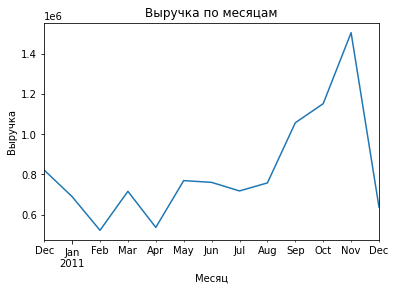

In [59]:
# график выручки по месяцам
df.groupby('InvoiceMonth')['Revenue'].sum().plot()
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title('Выручка по месяцам')

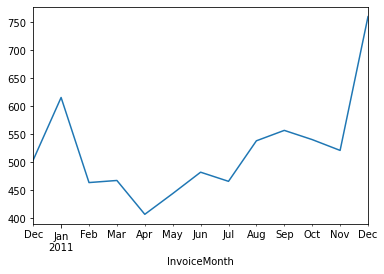

In [64]:
#средний чек
ave_inv=df.groupby('InvoiceMonth')['Revenue'].sum().divide(df.groupby('InvoiceMonth')['InvoiceNo'].nunique())
ave_inv.plot()

Посчитаем ретеншн по когортам

In [73]:

df[df['CustomerID'].notnull()].groupby('CustomerID')['InvoiceDate'].min()

CustomerID
12346   2011-01-18 10:01:00
12347   2010-12-07 14:57:00
12348   2010-12-16 19:09:00
12349   2011-11-21 09:51:00
12350   2011-02-02 16:01:00
                ...        
18280   2011-03-07 09:52:00
18281   2011-06-12 10:53:00
18282   2011-08-05 13:35:00
18283   2011-01-06 14:14:00
18287   2011-05-22 10:39:00
Name: InvoiceDate, Length: 4339, dtype: datetime64[ns]

In [85]:
cohort = pd.DataFrame(df[df['CustomerID'].notnull()].groupby('CustomerID')['InvoiceDate'].min().dt.to_period('M')).reset_index().rename(columns={'InvoiceDate':'Cohort'})
cohort

,CustomerID,Cohort
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02
...,...,...
4334,18280,2011-03
4335,18281,2011-06
4336,18282,2011-08
4337,18283,2011-01


In [87]:
cohort['CustomerID']=cohort['CustomerID'].astype('object')

In [89]:
df_merged = df.merge(cohort, how='left', on = 'CustomerID')
df_merged

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
526047,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12,2011-08
526048,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12,2011-08
526049,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08
526050,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12,2011-08


In [97]:
Number_purchases=pd.DataFrame(df_merged.groupby(['Cohort', 'InvoiceMonth'])['CustomerID'].nunique()).reset_index().rename({'CustomerID':'Number_purchases'}).\
sort_values(by = ['Cohort','InvoiceMonth'])
Number_purchases

,Cohort,InvoiceMonth,CustomerID
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321
...,...,...,...
86,2011-10,2011-11,86
87,2011-10,2011-12,41
88,2011-11,2011-11,324
89,2011-11,2011-12,36


In [114]:
Number_purchases['CohortLT']=(Number_purchases.groupby('Cohort')['InvoiceMonth'].rank(method='first')-1).astype('int64')


In [115]:
Number_purchases=Number_purchases.rename({'CustomerID':'TotalUsers'}, axis=1)
Number_purchases

,Cohort,InvoiceMonth,TotalUsers,CohortLT
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4
...,...,...,...,...
86,2011-10,2011-11,86,1
87,2011-10,2011-12,41,2
88,2011-11,2011-11,324,0
89,2011-11,2011-12,36,1


In [116]:
# определим количество покупок в первый месяц когорты (100%)
cohort_group_size=Number_purchases.groupby('Cohort')['TotalUsers'].first()
cohort_group_size

Cohort
2010-12    885
2011-01    417
2011-02    380
2011-03    452
2011-04    300
2011-05    284
2011-06    242
2011-07    188
2011-08    169
2011-09    299
2011-10    358
2011-11    324
2011-12     41
Freq: M, Name: TotalUsers, dtype: int64

In [125]:
# узнаем какой процент покупок этой когортой совершался в последующие месяца
user_retention=pd.pivot_table(Number_purchases, index='Cohort', columns='CohortLT', values='TotalUsers', aggfunc=sum ).reset_index().set_index('Cohort')\
.divide(cohort_group_size, axis=0)
user_retention

CohortLT,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


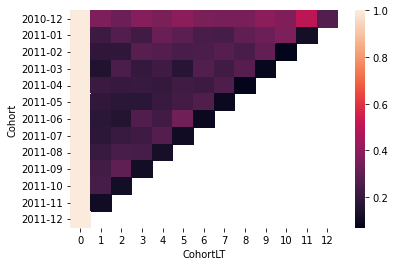

In [134]:
sns.heatmap(user_retention)

In [137]:
#альтернативный способ подсчета ретеншн
cohorts = df_merged.groupby(['Cohort', 'InvoiceMonth']).agg({'CustomerID': 'nunique'})


CustomerID
Cohort  InvoiceMonth            
2010-12 2010-12              885
        2011-01              324
        2011-02              286
        2011-03              340
        2011-04              321
...                          ...
2011-10 2011-11               86
        2011-12               41
2011-11 2011-11              324
        2011-12               36
2011-12 2011-12               41

[91 rows x 1 columns]

In [138]:
def cohort_period(df):
  df['CohortLT1'] = np.arange(len(df))
  return df

In [140]:
cohorts=cohorts.groupby(level=0).apply(cohort_period)
cohorts

CustomerID  CohortLT1
Cohort  InvoiceMonth                       
2010-12 2010-12              885          0
        2011-01              324          1
        2011-02              286          2
        2011-03              340          3
        2011-04              321          4
...                          ...        ...
2011-10 2011-11               86          1
        2011-12               41          2
2011-11 2011-11              324          0
        2011-12               36          1
2011-12 2011-12               41          0

[91 rows x 2 columns]

In [150]:
cohorts=cohorts.reset_index().set_index(['Cohort','CohortLT1'])


In [152]:
cohorts=cohorts.rename({'CustomerID': 'TotalUsers'}, axis=1)

In [153]:
cohorts

InvoiceMonth  TotalUsers
Cohort  CohortLT1                         
2010-12 0              2010-12         885
        1              2011-01         324
        2              2011-02         286
        3              2011-03         340
        4              2011-04         321
...                        ...         ...
2011-10 1              2011-11          86
        2              2011-12          41
2011-11 0              2011-11         324
        1              2011-12          36
2011-12 0              2011-12          41

[91 rows x 2 columns]

In [155]:
cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

Cohort,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortLT1,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.366102,0.220624,0.186842,0.150442,0.213333,0.190141,0.173554,0.180851,0.207101,0.234114,0.240223,0.111111,NaN
2,0.323164,0.266187,0.186842,0.252212,0.203333,0.172535,0.157025,0.207447,0.248521,0.301003,0.114525,NaN,NaN
3,0.384181,0.230216,0.284211,0.199115,0.210000,0.172535,0.264463,0.223404,0.242604,0.113712,NaN,NaN,NaN
4,0.362712,0.321343,0.271053,0.223451,0.196667,0.207746,0.231405,0.271277,0.124260,NaN,NaN,NaN,NaN
5,0.397740,0.287770,0.247368,0.168142,0.226667,0.232394,0.334711,0.111702,NaN,NaN,NaN,NaN,NaN
6,0.362712,0.247002,0.252632,0.267699,0.216667,0.264085,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
7,0.349153,0.242206,0.278947,0.230088,0.260000,0.095070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.353672,0.299760,0.247368,0.278761,0.073333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
